In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url1 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
df = pd.read_csv(url1, sep = ',', index_col = 0)

Добавляем столбцы "date" и "day_of_week"

In [2]:
from datetime import date
df['date'] = df.apply (lambda x: date (x.year, x.month, x.day), axis = 1)
df['day_of_week'] = pd.to_datetime (df.date).dt.dayofweek

### Цель №1: Узнать, в какой из месяцев в среднем наибольшая задержка вылета и сколь велико отклонение от значения среднегодовой задержки.

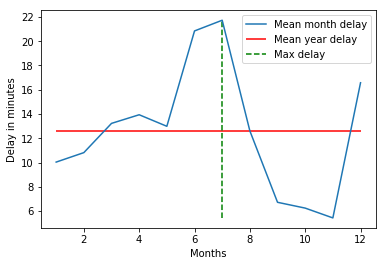

In [3]:
plt.plot (df.groupby (['month']).dep_delay.mean(), label = 'Mean month delay')
M = df.dep_delay.mean()
plt.hlines (M, 1, 12, colors = 'r', label = 'Mean year delay')
plt.vlines (df.groupby (['month']).dep_delay.mean().idxmax(), df.groupby (['month']).dep_delay.mean().min(), df.groupby (['month']).dep_delay.mean().max(), colors = 'g', linestyles = '--', label = 'Max delay')
plt.xlabel ("Months")
plt.ylabel ("Delay in minutes")
plt.legend()
plt.show()

Видим, что максимальная средняя задержка в июле (7 месяц).
Вычислим отклонение задержки в июле от среднегодовой.

In [4]:
print ("Средняя задержка вылета за год:", M)
print ("Средняя задержка вылета за июль:", df[df.month == 7].dep_delay.mean())
print ("Средняя задержка в июле больше среднегодовой на ", round((df[df.month == 7].dep_delay.mean() - M)/M*100, 2), "%", sep="")

Средняя задержка вылета за год: 12.639070257304708
Средняя задержка вылета за июль: 21.727786554326837
Средняя задержка в июле больше среднегодовой на 71.91%


### Вывод №1: В июле уровень средней задержки максимален и больше годового на 72%. Это может быть связано с сезоном отпусков и, вытекающим из этого, увеличением загруженности авиалиний

#### Теперь хотим выявить не сезонные проблемы, а устойчиво сохраняющиеся в течение года. Для этого исследуем зависимость задержек от дня недели.
### Цель №2: Узнать, в какой из дней недели в среднем наибольшая задержка вылета и сколь велико отклонение от значения среднегодовой задержки

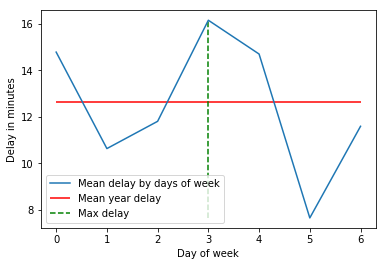

In [5]:
plt.plot (df.groupby (['day_of_week']).dep_delay.mean(), label = 'Mean delay by days of week')
plt.hlines (M, 0, 6, colors = 'r', label = 'Mean year delay')
plt.vlines (df.groupby (['day_of_week']).dep_delay.mean().idxmax(), df.groupby (['day_of_week']).dep_delay.mean().min(), df.groupby (['day_of_week']).dep_delay.mean().max(), colors = 'g', linestyles = '--', label = 'Max delay')
plt.xlabel ("Day of week")
plt.ylabel ("Delay in minutes")
plt.legend()
plt.show()

Видим, что максимальная средняя задержка по четвергам (3 день недели при нумерации с 0). Вычислим отклонение задержки по четвергам от среднегодовой.

In [6]:
print ("Средняя задержка вылета за год:", M)
print ("Средняя задержка вылета по четвергам:", df[df.day_of_week == 3].dep_delay.mean())
print ("Средняя задержка по четвергам больше среднегодовой на ", round((df[df.day_of_week == 3].dep_delay.mean() - M)/M*100, 2), "%", sep="")

Средняя задержка вылета за год: 12.639070257304708
Средняя задержка вылета по четвергам: 16.148919990957108
Средняя задержка по четвергам больше среднегодовой на 27.77%


### Вывод №2: По четвергам уровень средней задержки максимален и больше годового на 72%. 
#### Данный вывод не согласуется с интуицей: непонятно, почему именно по четвергам, в будние дни по середине недели, задержка в среднем максимальна. Это наталкивает на мысль о неидеальности выбранной модели. Для проверки данного тезиса воспользуемся следующим эвристическим соображением: большее количество рейсов в день -> бóльшая загруженность аэропортов -> более существенные задержки вылета (если данные модели не будут согласовываться с этой логической цепочкой, то, возможно, стоит скорректировать модель).

### Цель №3: Проверить, верно ли, что в месяцы/дни недели с бóльшим количеством рейсов на день больше и средняя задержка.

Вычисляем среднее количество рейсов в день внутри каждого из месяцев/дней недели.

In [7]:
print ((df.groupby (['month']).size() / np.unique (df.groupby (['date']).month.max(), return_counts = True)[1]).sort_values(ascending = False))
print('\n')
print ((df.groupby (['day_of_week']).size() / np.unique (df.groupby (['date']).day_of_week.max(), return_counts = True)[1]).sort_values(ascending = False))

month
7     949.193548
8     946.032258
4     944.333333
6     941.433333
10    931.903226
3     930.129032
5     928.903226
9     919.133333
11    908.933333
12    907.580645
2     891.107143
1     871.096774
dtype: float64


day_of_week
0    974.807692
4    967.461538
3    965.750000
2    962.692308
1    951.358491
6    891.480769
5    744.615385
dtype: float64


Изобразим полученные данные на круговой диаграмме.

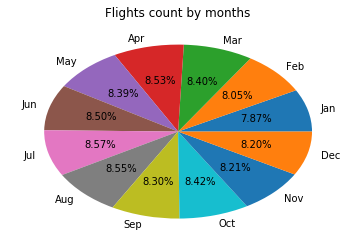

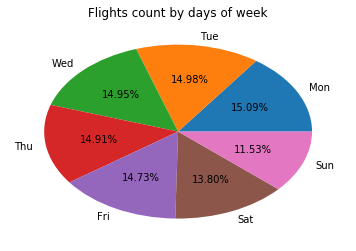

In [8]:
import calendar
plt.pie (df.groupby (['month']).size() / np.unique (df.groupby (['date']).month.max(), return_counts = True)[1], labels = calendar.month_abbr[1:], autopct='%1.2f%%')
plt.title ('Flights count by months')
plt.show()
plt.pie ((df.groupby (['day_of_week']).size() / np.unique (df.groupby (['date']).day_of_week.max(), return_counts = True)[1]).sort_values(ascending = False), labels = calendar.day_abbr[:], autopct='%1.2f%%')
plt.title ('Flights count by days of week')
plt.show()

Таким образом, полученные результаты для месяцев согласуются с гипотезой (июль - месяц с максимальной плотностью количества рейсов), а для дней недели - не согласуются (четверг на 3 месте из 7 возможных по плотности рейсов).

Для более развернутого ответа на вопрос о связи плотности рейсов со средней величиной задержки построим их на одном графике (пронормировав плотности на константу для совпадения порядков величин) и посчитаем коэффициенты корреляции.

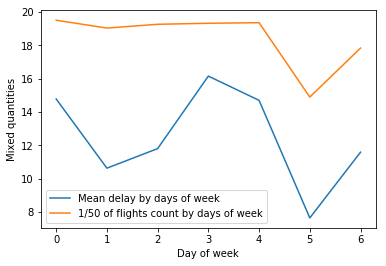

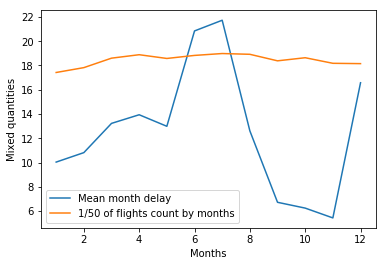

коэффициент корреляции для дней недели = 0.807486553362296
коэффициент корреляции для месяцев = 0.44722556965170474


In [9]:
plt.plot (df.groupby (['day_of_week']).dep_delay.mean(), label = 'Mean delay by days of week')
plt.plot (df.groupby (['day_of_week']).size() / np.unique (df.groupby (['date']).day_of_week.max(), return_counts = True)[1] / 50, label = '1/50 of flights count by days of week')
plt.xlabel ("Day of week")
plt.ylabel ("Mixed quantities")
plt.legend()
plt.show()

plt.plot (df.groupby (['month']).dep_delay.mean(), label = 'Mean month delay')
plt.plot (df.groupby (['month']).size() / np.unique (df.groupby (['date']).month.max(), return_counts = True)[1] / 50, label = '1/50 of flights count by months')
plt.xlabel ("Months")
plt.ylabel ("Mixed quantities")
plt.legend()
plt.show()

print ('коэффициент корреляции для дней недели =', np.corrcoef (df.groupby (['day_of_week']).dep_delay.mean(), df.groupby (['day_of_week']).size() / np.unique (df.groupby (['date']).day_of_week.max(), return_counts = True)[1])[0][1])
print ('коэффициент корреляции для месяцев =', np.corrcoef (df.groupby (['month']).dep_delay.mean(), df.groupby (['month']).size() / np.unique (df.groupby (['date']).month.max(), return_counts = True)[1])[0][1])

В случае с месяцами результаты согласовываются с гипотезой: на графике высматривается подобие 2 кривых, и большой коэффициент корреляции подтверждает высокую зависимость виличин. Для дней недель же график абсолютно неинформативен, но тем не менее положительный коэффициент корреляции свидетельствует о том, что с увеличением плотности рейсов увеличивается и уровень задержек, что частично подтверждает предположение.

### Вывод №3: По результатам тестов можно говорить лишь о частичном подтверждении гипотезы как для дней недель, так и для месяцев (для месяцев согласованы максимумы средней задержки и плотности рейсов, а для дней недели имеются высокий коэффициент корреляции и подобие графиков).

#### Данный вывод наталкивает на мысль, что стоит рассмотреть еще одну модель данных. Ранее мы оценивали среднюю величину задержки для всех рейсов, то есть учитывали отрицательный вклад в это значение для рейсов, отправленных раньше запланированного времени. Теперь же мы хотим оценить среднюю задержку только для рейсов, отправленных позже запланированного времени (с dep_delay>0).

### Цель №4: Исследовать, насколько хорошо средние значения количества рейсов по месяцам/дням недели описывают приведенную выше модель средней задержки среди рейсов с dep_delay>0 и как поменяются характеристики, вычисленные в первых 3 пунктах.

In [10]:
df_new = df[df.dep_delay > 0]

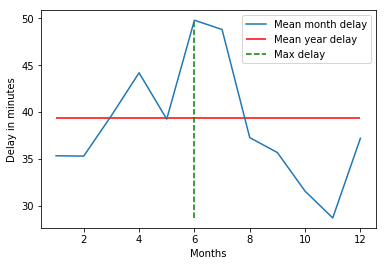

In [11]:
plt.plot (df_new.groupby (['month']).dep_delay.mean(), label = 'Mean month delay')
M = df_new.dep_delay.mean()
plt.hlines (M, 1, 12, colors = 'r', label = 'Mean year delay')
plt.vlines (df_new.groupby (['month']).dep_delay.mean().idxmax(), df_new.groupby (['month']).dep_delay.mean().min(), df_new.groupby (['month']).dep_delay.mean().max(), colors = 'g', linestyles = '--', label = 'Max delay')
plt.xlabel ("Months")
plt.ylabel ("Delay in minutes")
plt.legend()
plt.show()

Видим, что максимальная средняя задержка в июне (6 месяц). Вычислим отклонение задержки в июне от среднегодовой.

In [12]:
print ("Средняя задержка вылета за год:", M)
print ("Средняя задержка вылета за июнь:", df_new[df_new.month == 6].dep_delay.mean())
print ("Средняя задержка в июне больше среднегодовой на ", round((df_new[df_new.month == 6].dep_delay.mean() - M)/M*100, 2), "%", sep="")

Средняя задержка вылета за год: 39.37323252771895
Средняя задержка вылета за июнь: 49.790912682734096
Средняя задержка в июне больше среднегодовой на 26.46%


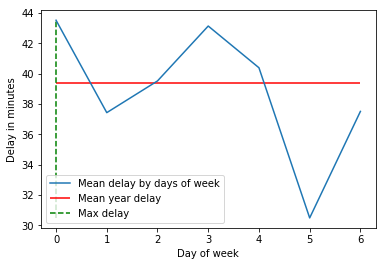

In [13]:
plt.plot (df_new.groupby (['day_of_week']).dep_delay.mean(), label = 'Mean delay by days of week')
plt.hlines (M, 0, 6, colors = 'r', label = 'Mean year delay')
plt.vlines (df_new.groupby (['day_of_week']).dep_delay.mean().idxmax(), df_new.groupby (['day_of_week']).dep_delay.mean().min(), df_new.groupby (['day_of_week']).dep_delay.mean().max(), colors = 'g', linestyles = '--', label = 'Max delay')
plt.xlabel ("Day of week")
plt.ylabel ("Delay in minutes")
plt.legend()
plt.show()

Видим, что максимальная средняя задержка по понедельникам (0 день недели). Вычислим отклонение задержки по понедельникам от среднегодовой.

In [14]:
print ("Средняя задержка вылета за год:", M)
print ("Средняя задержка вылета по понедельникам:", df_new[df_new.day_of_week == 0].dep_delay.mean())
print ("Средняя задержка по понедельникам больше среднегодовой на ", round((df_new[df_new.day_of_week == 0].dep_delay.mean() - M)/M*100, 2), "%", sep="")

Средняя задержка вылета за год: 39.37323252771895
Средняя задержка вылета по понедельникам: 43.520534139581756
Средняя задержка по понедельникам больше среднегодовой на 10.53%


Продублируем круговые диаграммы, приведенные ранее.

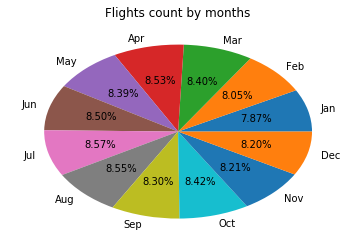

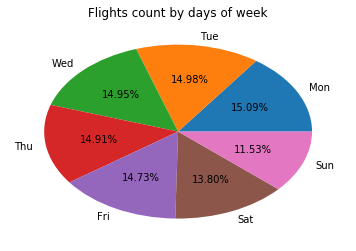

In [15]:
import calendar
plt.pie (df.groupby (['month']).size() / np.unique (df.groupby (['date']).month.max(), return_counts = True)[1], labels = calendar.month_abbr[1:], autopct='%1.2f%%')
plt.title ('Flights count by months')
plt.show()
plt.pie ((df.groupby (['day_of_week']).size() / np.unique (df.groupby (['date']).day_of_week.max(), return_counts = True)[1]).sort_values(ascending = False), labels = calendar.day_abbr[:], autopct='%1.2f%%')
plt.title ('Flights count by days of week')
plt.show()

Для новой модели на первом этапе получили диаметрально противоположные результаты: для понедельника максимальна как плотность количества рейсов, так и средняя задержка, вычисляемая по новой модели; по месяцам же средняя задержка теперь максимальна для июня, а среднее количество рейсов - для июля.

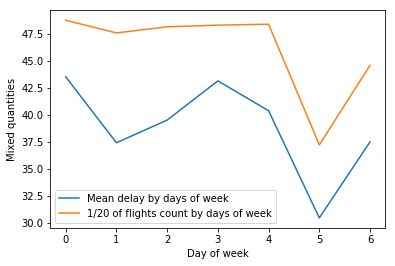

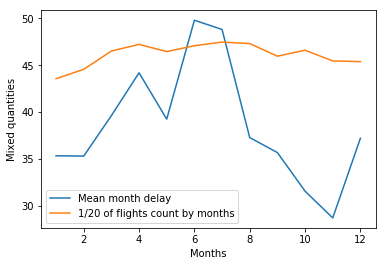

коэффициент корреляции для дней недели = 0.9128829129804675
коэффициент корреляции для месяцев = 0.5711523929489563


In [16]:
plt.plot (df_new.groupby (['day_of_week']).dep_delay.mean(), label = 'Mean delay by days of week')
plt.plot (df.groupby (['day_of_week']).size() / np.unique (df.groupby (['date']).day_of_week.max(), return_counts = True)[1] / 20, label = '1/20 of flights count by days of week')
plt.xlabel ("Day of week")
plt.ylabel ("Mixed quantities")
plt.legend()
plt.show()

plt.plot (df_new.groupby (['month']).dep_delay.mean(), label = 'Mean month delay')
plt.plot (df.groupby (['month']).size() / np.unique (df.groupby (['date']).month.max(), return_counts = True)[1] / 20, label = '1/20 of flights count by months')
plt.xlabel ("Months")
plt.ylabel ("Mixed quantities")
plt.legend()
plt.show()

print ('коэффициент корреляции для дней недели =', np.corrcoef (df_new.groupby (['day_of_week']).dep_delay.mean(), df.groupby (['day_of_week']).size() / np.unique (df.groupby (['date']).day_of_week.max(), return_counts = True)[1])[0][1])
print ('коэффициент корреляции для месяцев =', np.corrcoef (df_new.groupby (['month']).dep_delay.mean(), df.groupby (['month']).size() / np.unique (df.groupby (['date']).month.max(), return_counts = True)[1])[0][1])

Видим, что что коэффициенты корреляции увеличились. Более того, для дней недели увеличение существенно: сократилось в 2 раза отставание корреляции от 1 - наибольшего возможного значения, при котором величины п.н. линейно зависимы.

### Вывод №4: В новой модели получили следующие результаты: по понедельникам уровень средней задержки максимален и больше годового на 10.5%; в июне средняя задержка максимальна и больше среднегодовой на 26.5%.

#### Вывод данной модели лучше согласуется с интуицей: июнь начинает сезон отпусков, поэтому становятся загруженными рейсы в курортные области страны, которые предыдущие месяцы были намного более свободными, что увеличивает количество работы у персонала на этих рейсах, и влечет задержки. По понедельникам же множество людей возвращаются на работу с выходных, на которых навещали семью/просто были в гостях в другом городе + в начале недели многие компании проводят совещания в головном офисе с представителями департаментов с регионов, заставляя последних совершать 2 перелета за день.

#### Примечание к 4 исследованию: мы не использовали новую модель при оценке средней плотности рейсов в день недели/месяц, потому что в таком случае мы оценивали бы корреляцию 2 величин, зависящих от распределения задержек, что было бы абсолютно бесполезным для дальнейшего использования: в начале года(в начале дня/недели/месяца) нам известно лишь расписание рейсов, и неизвестно, сколько из них будет задержано. Следующая выкладка показывает, что корреляция при таком тесте была бы еще больше, но как сказано выше, эта корреляция не позволяет количественно оценивать уровень будущих задержек.

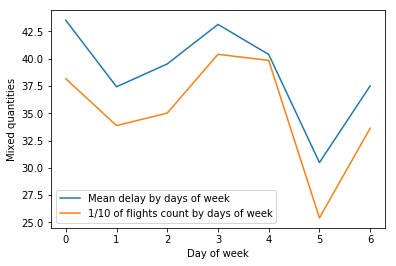

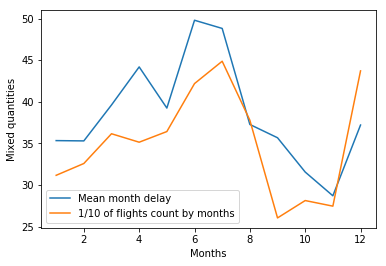

коэффициент корреляции для дней недели = 0.9513939371236977
коэффициент корреляции для месяцев = 0.7645259882216006


In [17]:
plt.plot (df_new.groupby (['day_of_week']).dep_delay.mean(), label = 'Mean delay by days of week')
plt.plot (df_new.groupby (['day_of_week']).size() / np.unique (df_new.groupby (['date']).day_of_week.max(), return_counts = True)[1] / 10, label = '1/10 of flights count by days of week')
plt.xlabel ("Day of week")
plt.ylabel ("Mixed quantities")
plt.legend()
plt.show()

plt.plot (df_new.groupby (['month']).dep_delay.mean(), label = 'Mean month delay')
plt.plot (df_new.groupby (['month']).size() / np.unique (df_new.groupby (['date']).month.max(), return_counts = True)[1] / 10, label = '1/10 of flights count by months')
plt.xlabel ("Months")
plt.ylabel ("Mixed quantities")
plt.legend()
plt.show()

print ('коэффициент корреляции для дней недели =', np.corrcoef (df_new.groupby (['day_of_week']).dep_delay.mean(), df_new.groupby (['day_of_week']).size() / np.unique (df_new.groupby (['date']).day_of_week.max(), return_counts = True)[1])[0][1])
print ('коэффициент корреляции для месяцев =', np.corrcoef (df_new.groupby (['month']).dep_delay.mean(), df_new.groupby (['month']).size() / np.unique (df_new.groupby (['date']).month.max(), return_counts = True)[1])[0][1])

## Теперь оцениваем зависимость задержек от погоды.

In [18]:
url2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
wea = pd.read_csv(url2, sep = ',', index_col = 0)

Удаляем столбцы, где в параметрах даты/времени есть NaN-значения; создаем новый столбец с полной информацией о дате и времени.

In [19]:
from datetime import datetime
wea = wea.loc[~(np.isnan (wea.year) | np.isnan (wea.month) | np.isnan (wea.day) | np.isnan (wea.hour))]
wea['time'] = wea.apply (lambda x: datetime (x.year, int(x.month), int(x.day), int(x.hour)), axis = 1)
wea.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time
1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 00:00:00
2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 01:00:00
3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 02:00:00
4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 03:00:00
5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 04:00:00


Чистим df от NaN-значений и от ошибок в виде 60-ой минуты или 24-го часа. Затем, как и выше, добавляем общую характеристику даты/времени с округлением до ближайшего часа.

In [20]:
from datetime import timedelta
df_clean = df.loc[(df.minute < 60) & (df.hour < 24) & (~(np.isnan (df.year) | np.isnan (df.month) | np.isnan (df.day) | np.isnan (df.hour)))]
df_clean.index = range (1, len(df_clean)+1)
df_clean['time'] = df_clean.apply (lambda x: datetime (x.year, int(x.month), int(x.day), int(x.hour)) + timedelta(hours = int(x.minute >= 30)) , axis = 1)
df_clean.head()

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,date,day_of_week,time
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,2013-01-01,1,2013-01-01 05:00:00
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,2013-01-01,1,2013-01-01 06:00:00
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,2013-01-01,1,2013-01-01 06:00:00
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,2013-01-01,1,2013-01-01 06:00:00
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,2013-01-01,1,2013-01-01 06:00:00


Строим новую таблицу df_wea слиянием df и wea по параметру времени, удаляя получившиеся при этом дубликаты столбцов, присутсвовавших в обеих таблицах (столбцы-характеристики даты и времени).

In [21]:
df_wea = df_clean.merge (wea, how = 'inner', on = 'time', copy = False, suffixes=('', '_delme'))
df_wea = df_wea[[c for c in df_wea.columns if not c.endswith('_delme')]]
df_wea.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,...,time,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,...,2013-01-01 06:00:00,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
1,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,...,2013-01-01 06:00:00,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
2,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,...,2013-01-01 06:00:00,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,...,2013-01-01 06:00:00,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,...,2013-01-01 06:00:00,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0


### Цель №5: Исследовать, как уровень видимости влияет на задержки. Верно ли, что при минимальной видимости (1 по 10-балльной шкале) средние задержки максимальны? И если да, то на сколько в процентном соотношении они больше среднегодовых задержек?

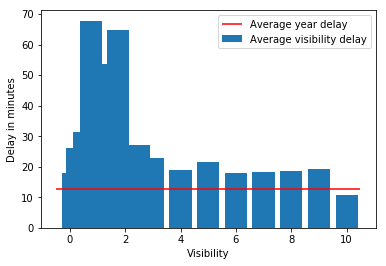

In [22]:
plt.bar (df_wea.groupby(['visib']).dep_delay.mean().index, df_wea.groupby(['visib']).dep_delay.mean(), label = 'Average visibility delay')
M = df_wea.dep_delay.mean()
plt.hlines (M, -0.5, 10.5, colors = 'r', label = 'Average year delay')
plt.xlabel ('Visibility')
plt.ylabel ("Delay in minutes")
plt.legend()
plt.show()

Видим, что дробные значения уровней видимости искажают картину. Можно предположить, что дробные значения попадали в датасет по ошибке, так как в классической шкале видимости присутствуют только целые значения. Поэтому оставим в рамках этого исследования только строки датафрейма с целыми значениями видимости.

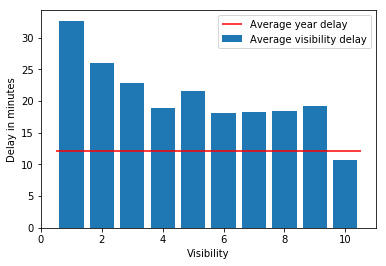

In [23]:
df_wea1 = df_wea[df_wea.visib%1 == 0]
plt.bar (df_wea1.groupby(['visib']).dep_delay.mean().index, df_wea1.groupby(['visib']).dep_delay.mean(), label = 'Average visibility delay')
M = df_wea1.dep_delay.mean()
plt.hlines (M, 0.5, 10.5, colors = 'r', label = 'Average year delay')
plt.xlabel ('Visibility')
plt.ylabel ("Delay in minutes")
plt.legend()
plt.show()

Теперь данные стали более однородными, и видно, что действительно при наименьшем уровне видимости задержки максимальны. Вычислим их отклонение от среднегодовых.

In [24]:
print ("Средняя задержка вылета за год:", M)
print ("Средняя задержка вылета при первом уровне видимости:", df_wea1[df_wea1.visib == 1].dep_delay.mean())
print ("Средняя задержка при первом уровне видимости больше среднегодовой на ", round((df_wea1[df_wea1.visib == 1].dep_delay.mean() - M)/M*100, 2), "%", sep="")

Средняя задержка вылета за год: 12.159622005484797
Средняя задержка вылета при первом уровне видимости: 32.67793744716822
Средняя задержка при первом уровне видимости больше среднегодовой на 168.74%


### Вывод №5: При наименьшем уровне видимости средняя задержка максимальна и больше среднегодовой на 158%. Также из графика видно, что при всех уровнях видимости кроме 10 средняя задержка больше среднегодовой. Это связано с тем, что бóльшую часть времени видимость максимальна и равна 10.

### Цель №6: Выяснить, верно ли, что с увеличением температуры растет и средняя задержка. Найти отклонение средней задержки для 10%  рейсов с наибольшей температурой воздуха от среднегодовой задержки.

Исключаем из рассмотрения строки таблицы, где температура не определена. Для построения графика удобнее создать переменную с температурой, округленной до ближайшего целого, чтобы среднее значение для уровней на графике бралось по большему множеству.

In [25]:
df_wea2 = df_wea[~np.isnan (df_wea.temp)]
df_wea2['temp_1'] = df_wea2.apply (lambda x: round(x.temp), axis = 1)
df_wea2.head()

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,temp_1
0,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,...,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0,39
1,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,...,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0,39
2,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,...,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0,39
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,...,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0,39
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,...,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0,39


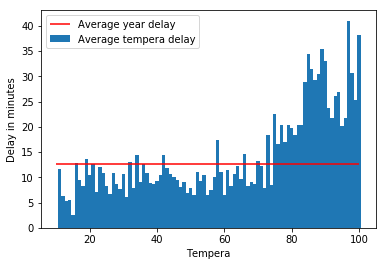

In [26]:
plt.bar (df_wea2.groupby(['temp_1']).dep_delay.mean().index, df_wea2.groupby(['temp_1']).dep_delay.mean(), width = 1, label = 'Average tempera delay')
M = df_wea2.dep_delay.mean()
plt.hlines (M, 10, 100, colors = 'r', label = 'Average year delay')
plt.xlabel ('Tempera')
plt.ylabel ("Delay in minutes")
plt.legend()
plt.show()

Видим, что на графике действительно присутствует восходящий тренд.

Находим уровень 90-процентной квантили для температуры.

In [27]:
a = df_wea2.sort_values ('temp', ascending = False)
a.index = range(len(a))
temp_0 = a.loc[len(a)//10].temp
print ('Tempera border =', temp_0)
a.head()

Tempera border = 80.06


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,temp_1
0,2013,7,19,2009.0,2.0,2349.0,-10.0,UA,N37420,1244,...,100.04,71.06,39.51,230.0,20.71404,23.837303,0.0,1009.4,10.0,100
1,2013,7,19,2004.0,-3.0,2309.0,10.0,B6,N746JB,1505,...,100.04,71.06,39.51,230.0,20.71404,23.837303,0.0,1009.4,10.0,100
2,2013,7,19,1954.0,18.0,2228.0,-5.0,B6,N629JB,1271,...,100.04,71.06,39.51,230.0,20.71404,23.837303,0.0,1009.4,10.0,100
3,2013,7,19,1954.0,34.0,2245.0,7.0,UA,N812UA,312,...,100.04,71.06,39.51,230.0,20.71404,23.837303,0.0,1009.4,10.0,100
4,2013,7,19,2000.0,-5.0,40.0,NaN,B6,N568JB,105,...,100.04,71.06,39.51,230.0,20.71404,23.837303,0.0,1009.4,10.0,100


In [28]:
print ("Средняя задержка вылета за год:", M)
print ("Средняя задержка вылета при 10%-ом максимуме температуры:", df_wea2[df_wea2.temp >= temp_0].dep_delay.mean())
print ("Средняя задержка при 10%-ом максимуме температуры больше среднегодовой на ", round((df_wea2[df_wea2.temp >= temp_0].dep_delay.mean() - M)/M*100, 2), "%", sep="")

Средняя задержка вылета за год: 12.649931308197221
Средняя задержка вылета при 10%-ом максимуме температуры: 24.751581118862138
Средняя задержка при 10%-ом максимуме температуры больше среднегодовой на 95.67%


### Вывод №6: При температуре >= 80.06℉ (10% от общего числа рейсов) средняя задержка больше среднегодовой на 96%, то есть почти в 2 раза.